# 📊 Ulykkesanalyse basert på temperatur
Denne analysen undersøker hvordan antall trafikkulykker varierer med temperaturforhold, basert på datasettene fra Statens vegvesen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Les inn datasett
df_temp = pd.read_csv("Ulykker_med_temp.csv", encoding="ISO-8859-1", delimiter=";")

# Rydd opp kolonnenavn
df_temp.columns = df_temp.columns.str.strip().str.replace("\n", "")
df_temp.rename(columns={
    "Kommune": "Kommune",
    "Måned": "Måned",
    "År": "År",
    "Kaldere enn - 5 grader": "Under -5°C",
    "-5 t.o.m. 5 grader": "-5°C til 5°C",
    "Varmere enn 5 grader": "Over 5°C"
}, inplace=True)


## Analyse 1: Totalt antall ulykker per temperaturintervall

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_28668\338970281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_summary_df, x="Temperaturintervall", y="Antall ulykker", palette="coolwarm")


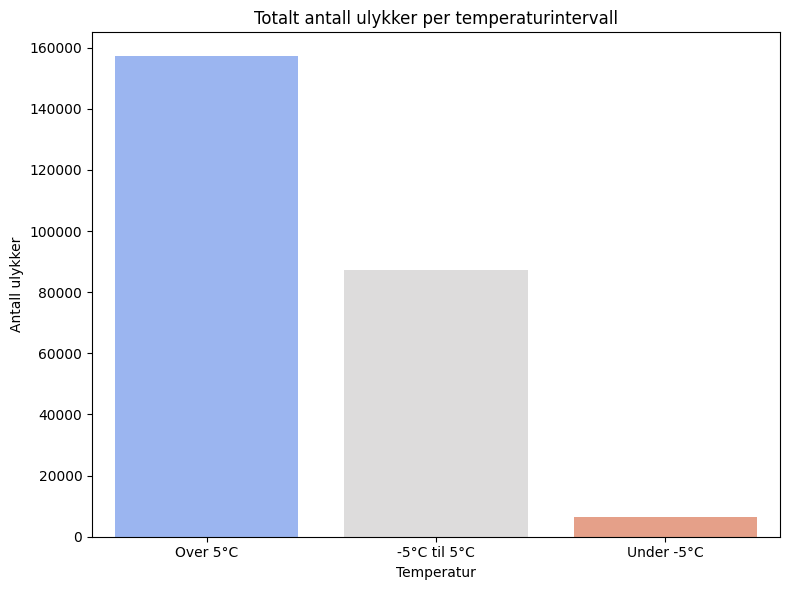

In [3]:
temp_summary = df_temp[["Under -5°C", "-5°C til 5°C", "Over 5°C"]].sum().sort_values(ascending=False)
temp_summary_df = temp_summary.reset_index()
temp_summary_df.columns = ["Temperaturintervall", "Antall ulykker"]

plt.figure(figsize=(8, 6))
sns.barplot(data=temp_summary_df, x="Temperaturintervall", y="Antall ulykker", palette="coolwarm")
plt.title("Totalt antall ulykker per temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xlabel("Temperatur")
plt.tight_layout()
plt.show()


**Observasjon:**
- **Flest ulykker skjer ved temperaturer over +5°C.**
- Deretter følger intervallet **-5°C til +5°C**.
- Færrest ulykker skjer ved temperaturer **under -5°C**.

**Tolkning:**
- Den høye ulykkesraten ved **temperaturer over +5°C** kan skyldes:
  - Mer trafikkaktivitet i milde og varme perioder (vår, sommer, høst).
  - Flere myke trafikanter (fotgjengere, syklister) og høyere fart.
- Intervallet **-5°C til +5°C** kan være preget av glatte og skiftende kjøreforhold (nullføre), men gir likevel færre ulykker totalt.
- Ved **temperaturer under -5°C** ser vi færrest ulykker, trolig fordi:
  - Færre velger å kjøre.
  - Bilførere er mer varsomme.
  - Vinterforholdene er mer stabile og forutsigbare.

## Analyse 2: Ulykker per temperaturintervall og måned

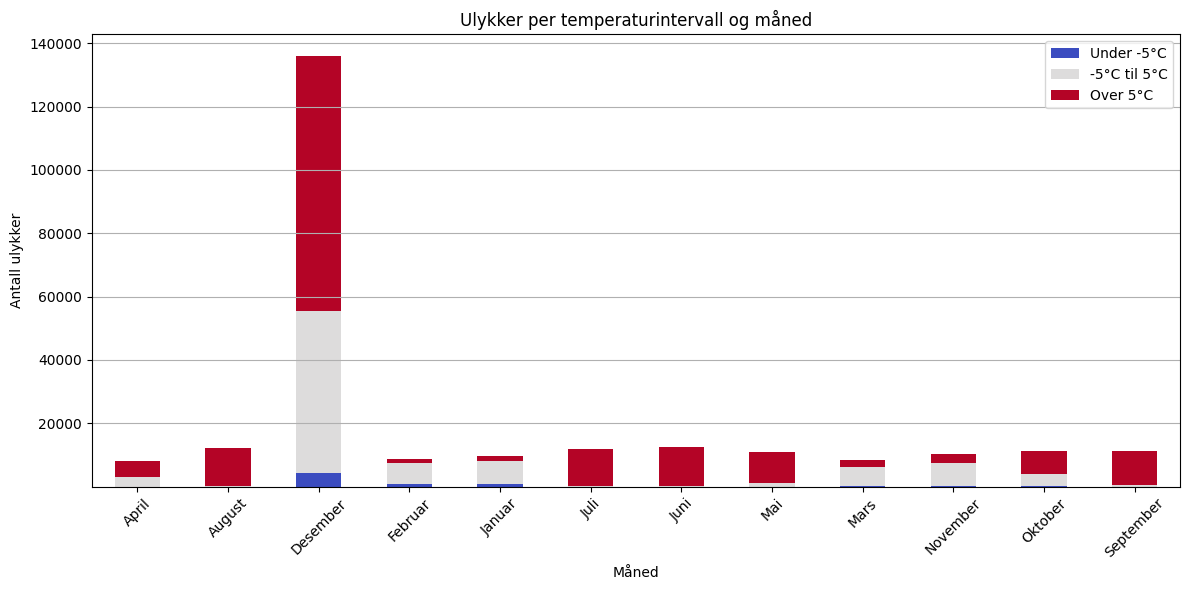

In [4]:
monthly_temp = df_temp.groupby("Måned")[["Under -5°C", "-5°C til 5°C", "Over 5°C"]].sum()

monthly_temp.plot(kind="bar", figsize=(12,6), stacked=True, colormap="coolwarm")
plt.title("Ulykker per temperaturintervall og måned")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### 📊 Ulykker per temperaturintervall og måned

**Observasjon:**
- **Desember** har ekstremt mange ulykker – spesielt i temperaturkategoriene **"-5°C til 5°C"** og **"Over 5°C"**.
- Sommermånedene (juni, juli, august) har også høy andel ulykker i **"Over 5°C"**.
- **Under -5°C** er kun betydelig i vintermånedene (desember–februar).

**Tolkning:**
- **Desember-effekten** kan skyldes:
  - Økt biltrafikk i førjulstiden.
  - Nullføre og skiftende værforhold.
  - Mørkere dager gir dårligere sikt.
- Det at mange ulykker skjer ved **over 5°C** tyder på at **trafikkmengde og aktivitet** har stor betydning – ikke bare været.
- Kulde under **-5°C** gir færre ulykker, trolig på grunn av redusert mobilitet og større forsiktighet.


## Analyse 3: Topp 10 kommuner med flest temperaturrelaterte ulykker

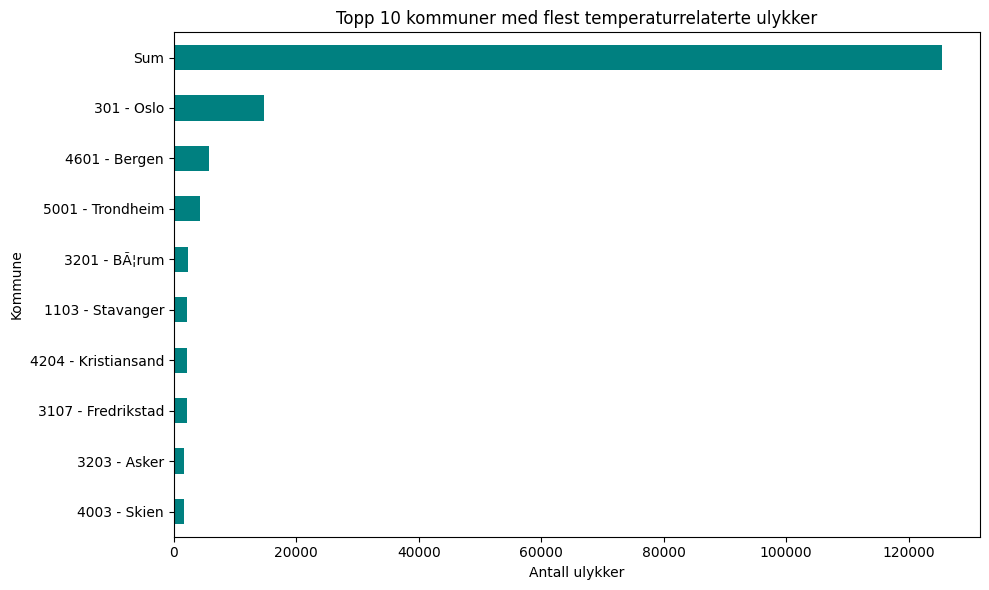

In [5]:
df_temp["Totalt"] = df_temp[["Under -5°C", "-5°C til 5°C", "Over 5°C"]].sum(axis=1)
kommune_temp = df_temp.groupby("Kommune")["Totalt"].sum().sort_values(ascending=False).head(10)

kommune_temp.plot(kind="barh", figsize=(10,6), color="teal")
plt.title("Topp 10 kommuner med flest temperaturrelaterte ulykker")
plt.xlabel("Antall ulykker")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 🏘️ Topp 10 kommuner med flest temperaturrelaterte ulykker

**Observasjon:**
- **Oslo** topper listen, etterfulgt av Bergen og Trondheim.
- Andre storbykommuner som Stavanger, Kristiansand og Fredrikstad er også blant topp 10.
- En rad med "Sum" vises i grafen – den representerer totalen og bør ignoreres i sammenligning.

**Tolkning:**
- **Tett befolkede byer** har naturlig flere ulykker på grunn av:
  - Høyere trafikkvolum.
  - Mer komplekse trafikkmiljø (busser, fotgjengere, syklister, kollektivfelt).
- Større byer kan også ha større variasjon i mikroklima og trafikkforhold.


## 🔹 Analyse 4: Sesongbasert ulykkesanalyse per temperaturintervall

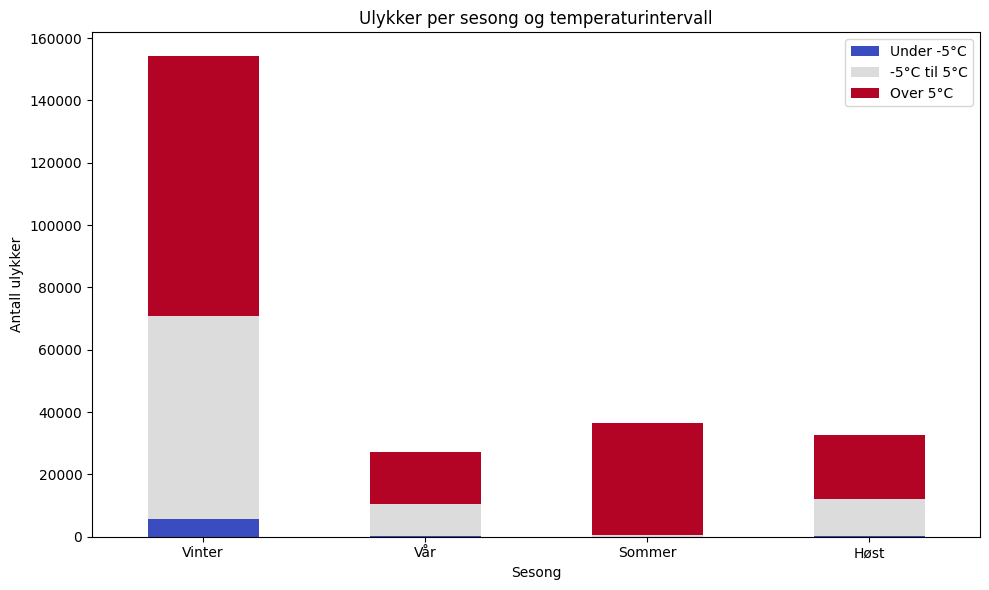

In [8]:
# Koble måned til sesong
måned_sesong = {
    "Januar": "Vinter", "Februar": "Vinter", "Desember": "Vinter",
    "Mars": "Vår", "April": "Vår", "Mai": "Vår",
    "Juni": "Sommer", "Juli": "Sommer", "August": "Sommer",
    "September": "Høst", "Oktober": "Høst", "November": "Høst"
}
df_temp["Sesong"] = df_temp["Måned"].map(måned_sesong)

# Summer ulykkene per sesong
sesong_data = df_temp.groupby("Sesong")[["Under -5°C", "-5°C til 5°C", "Over 5°C"]].sum()
sesong_data = sesong_data.reindex(["Vinter", "Vår", "Sommer", "Høst"])

# Plot
sesong_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Ulykker per sesong og temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Tolkning:**  
- Vinteren har flest ulykker i kategoriene under 5°C.
- Sommeren domineres av ulykker over 5°C, som forventet.
- Nullføre (mellom -5 og 5°C) ser ut til å være en risikofaktor både høst og vinter.


## 🔹 Analyse 5: Utvikling over tid (1990–2023) per temperaturintervall

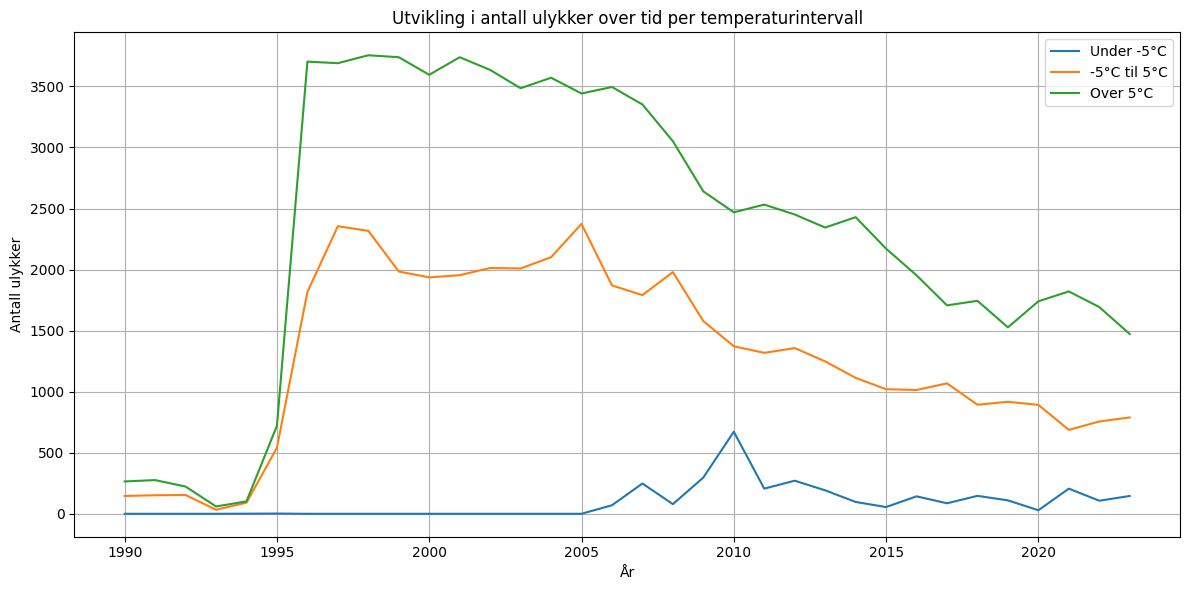

In [10]:
år_data = df_temp[df_temp["År"] >= 1990].groupby("År")[["Under -5°C", "-5°C til 5°C", "Over 5°C"]].sum()

år_data.plot(figsize=(12, 6))
plt.title("Utvikling i antall ulykker over tid per temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xlabel("År")
plt.grid(True)
plt.tight_layout()
plt.show()


**Tolkning:**  
- Totalt antall ulykker har variert over tid, men ser ut til å ha økt ved temperaturer over 5°C.
- Dette kan skyldes økt trafikk i varme måneder, urbanisering eller bedre registrering av ulykker.

## 🧾 Konklusjon: Temperatur og ulykker

**Oppsummering:**
- Flest ulykker skjer ved **temperaturer over +5°C**.
- **Desember** peker seg ut som den farligste måneden, trolig på grunn av kombinasjonen av vær og høy trafikk.
- Kuldegrader under **-5°C** gir færre ulykker – sannsynligvis på grunn av mer forsiktig kjøring og lavere trafikkmengde.
- Storbykommuner dominerer statistikken over temperaturrelaterte ulykker.

**Tolkning:**
- Vinteren har flest ulykker i kategoriene under 5°C.
- Sommeren domineres av ulykker over 5°C, som forventet.
- Nullføre (mellom -5 og 5°C) ser ut til å være en risikofaktor både høst og vinter.
- Totalt antall ulykker har variert over tid, men ser ut til å ha økt ved temperaturer over 5°C.
- Dette kan skyldes økt trafikk i varme måneder, urbanisering eller bedre registrering av ulykker.

### 📌 Anbefalinger:
- Økt trafikksikkerhetsfokus i **desember og vinterhalvåret**.
- Forebyggende tiltak mot ulykker i **nullføre** og i **områder med høy trafikkmengde**.
- Informasjonskampanjer rettet mot trygg kjøring i glatte forhold og mørketid.

> Trafikkmengde, føre og menneskelig atferd virker å ha større betydning for ulykkesrisiko enn temperatur alene.